# K-Means Clustering

# 1) Use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this

df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(df.shape)
df.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

In [0]:
drop_list = ['id', 'diagnosis', 'Unnamed: 32']
labels = df.diagnosis.replace({'M': 1, 'B': 0})  # B or M
data = df.drop(drop_list, axis=1)
data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Let's do it!

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to use the elbow method to decide on the number of clusters to use.


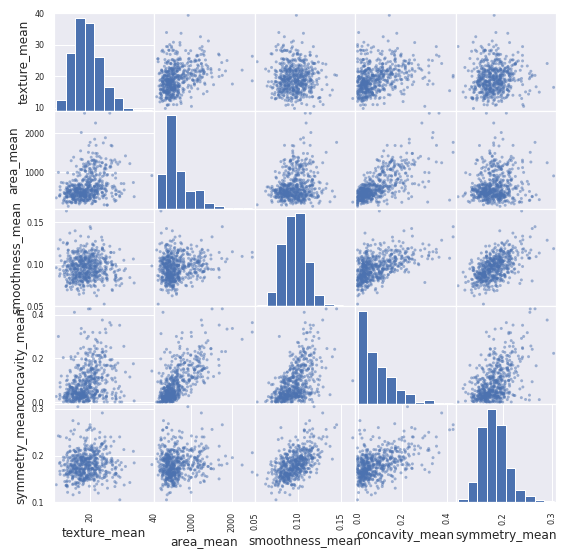

In [0]:
scatter_list = ['texture_mean','area_mean','smoothness_mean','concavity_mean',
                'symmetry_mean']
pd.plotting.scatter_matrix(data[scatter_list], figsize=(9,9))
plt.show()

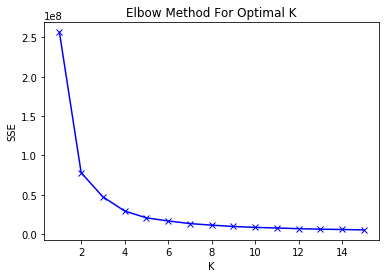

In [0]:
# Perform K-Means Clustering on the Dataset
'''
Function to plot the elbow graph of a dataset given the data and max K to reach
'''
def plot_elbow_graph(data, max_K=15):
  sum_of_squared_distances = []
  K = range(1, max_K+1)
  for k in K:
    # Calculate the SSE for each value of K
    km = KMeans(n_clusters=k)
    km = km.fit(data)
    sum_of_squared_distances.append(km.inertia_)
  
  # Plot the elbow graph
  plt.plot(K, sum_of_squared_distances, 'bx-')
  plt.xlabel('K')
  plt.ylabel('SSE')
  plt.title('Elbow Method For Optimal K')
  plt.show()

plot_elbow_graph(data)

In [0]:
# It looks like we should use 2 clusters for the data
kmeans = KMeans(n_clusters=2, random_state=0, n_init=50)
kmeans_labels = kmeans.fit_predict(data)
print(kmeans_labels)

[1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1
 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 1 

## Check you work: 

This is something that in a truly unsupervised learning situation **WOULD NOT BE POSSIBLE**. But for educational purposes go back and grab the true diagnosis column (label) from the original dataset. Take your cluster labels and compare them to the original diagnosis column. You can make scatterplots for each to see how they compare or you can calculate a percent accuracy score like: 
\begin{align}
\frac{\text{Num Correct Labels}}{\text{Num Total Observations}}
\end{align}

In [0]:
# Your Code Here
from sklearn.metrics import accuracy_score 
accuracy = accuracy_score(labels, kmeans_labels)
print('The percent accuracy score for all the data is',
      f'{round(accuracy*100,2)}%.')

The percent accuracy score for all the data is 85.41%.


# 2) Perform PCA on your dataset first and *then* use k-means clustering. 

- You need to standardize your data before PCA.
- First try clustering just on PC1 and PC2 so that you can make a scatterplot of your clustering.
- Then use use a scree plot to decide how many principal components to include in your clustering, and use however many principal components you need in order to retain 90% of the variation of the original dataset



In [0]:
##### Your Code Here #####
# Standardize the data
# Instantiate a StandardScaler object
scaler = StandardScaler()

# Use the object to fit_transform our data
Z = scaler.fit_transform(data)
# print("\n Standardized Data: \n", Z)

# Create the PCA instance
# Test the clustering on just PC1 and PC2
pca = PCA(2)

# Fit and transform our data
pca_features = pca.fit_transform(Z)
pca_features

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

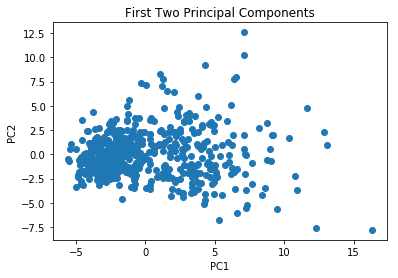

In [0]:
pc1 = pca_features[:, 0]
pc2 = pca_features[:, 1]
pc12_data = pd.DataFrame({'x': pc1, 'y': pc2})

plt.scatter(pc1, pc2)
plt.title("First Two Principal Components")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [0]:
# Cluster on the first 2 principal components
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(pc12_data)
y_kmeans1 = kmeans.predict(pc12_data)

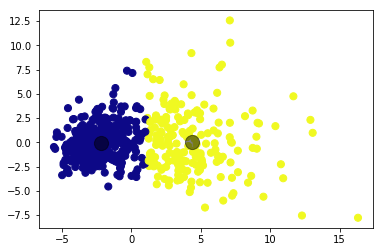

In [0]:
plt.scatter(pc1, pc2, c=y_kmeans1, s=50, cmap='plasma')

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='k', s=200, alpha=0.5);

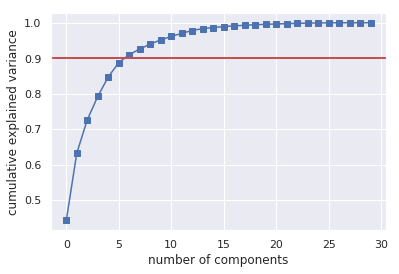

The number of components needed to explain 90% of the variance is 7


In [0]:
pca = PCA().fit(Z)
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='s')
plt.axhline(y=0.9, color='r', linewidth=2)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

num_components = np.where(np.cumsum(pca.explained_variance_ratio_) >= 0.90)
print('The number of components needed to explain 90% of the variance is',
      num_components[0][0]+1)

In [0]:
pca = PCA(7).fit_transform(Z)
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(pca)
y_kmeans2 = kmeans.predict(pca)

## Check your work: 

- Compare your PC1, PC2 clustering scatterplot to the clustering scatterplots you made on the raw data
- Calculate accuracy scores for both the PC1,PC2 Principal component clustering and the 90% of explained variance clustering.

How do your accuracy scores -when preprocessing the data with PCA- compare to the accuracy when simply clustering on the raw data?

In [0]:
accuracy1 = accuracy_score(y_kmeans1, labels)
print('The percent accuracy score for the first two PCs is',
      f'{round(accuracy1*100,2)}%.')

accuracy2 = accuracy_score(y_kmeans2, labels)
print('The percent accuracy score for the first seven PCs is',
      f'{round(accuracy2*100,2)}%.')

The percent accuracy score for the first two PCs is 90.69%.
The percent accuracy score for the first seven PCs is 91.04%.


# Stretch Goals:

- Study for the Sprint Challenge
- Work on your Data Storytelling Project

In [0]:
def pca_kmeans_accuracy(df, random_state=0):
  drop_list = ['id', 'diagnosis', 'Unnamed: 32']
  labels = df.diagnosis.replace({'M': 1, 'B': 0})  # B or M
  data = df.drop(drop_list, axis=1)
  # Standardize the data
  # Instantiate a StandardScaler object
  scaler = StandardScaler()

  # Use the object to fit_transform our data
  Z = scaler.fit_transform(data)
  for i in range(1,data.shape[1]+1):
    pca_features = PCA(i).fit_transform(Z)
    kmeans = KMeans(n_clusters=2, random_state=random_state, n_init=50)
    kmeans_fit = kmeans.fit(pca_features)
    idx = np.argsort(kmeans_fit.cluster_centers_.sum(axis=1))
    lookup_table = np.zeros_like(idx)
    lookup_table[idx] = np.arange(2)
    predicted_labels = lookup_table[kmeans_fit.predict(pca_features)]
    accuracy = accuracy_score(labels, predicted_labels)
    # if accuracy < 0.5:
    #   accuracy = 1 - accuracy
    if i == 1:
      print('The percent accuracy score for the first PC is',
            f'{round(accuracy*100,2)}%.')
    else:
      print(f'The percent accuracy score for the first {i} PCs is',
            f'{round(accuracy*100,2)}%.')
    
pca_kmeans_accuracy(df)

The percent accuracy score for the first PC is 90.86%.
The percent accuracy score for the first 2 PCs is 90.69%.
The percent accuracy score for the first 3 PCs is 91.04%.
The percent accuracy score for the first 4 PCs is 91.04%.
The percent accuracy score for the first 5 PCs is 91.04%.
The percent accuracy score for the first 6 PCs is 91.04%.
The percent accuracy score for the first 7 PCs is 91.04%.
The percent accuracy score for the first 8 PCs is 91.04%.
The percent accuracy score for the first 9 PCs is 91.04%.
The percent accuracy score for the first 10 PCs is 91.04%.
The percent accuracy score for the first 11 PCs is 91.04%.
The percent accuracy score for the first 12 PCs is 91.04%.
The percent accuracy score for the first 13 PCs is 91.04%.
The percent accuracy score for the first 14 PCs is 91.04%.
The percent accuracy score for the first 15 PCs is 91.04%.
The percent accuracy score for the first 16 PCs is 91.04%.
The percent accuracy score for the first 17 PCs is 91.04%.
The perce

For n_clusters = 2 The average silhouette_score is : 0.6972646156059465
For n_clusters = 3 The average silhouette_score is : 0.6660201620263426
For n_clusters = 4 The average silhouette_score is : 0.5334614737117133
For n_clusters = 5 The average silhouette_score is : 0.510229299790784
For n_clusters = 6 The average silhouette_score is : 0.4857922435948333


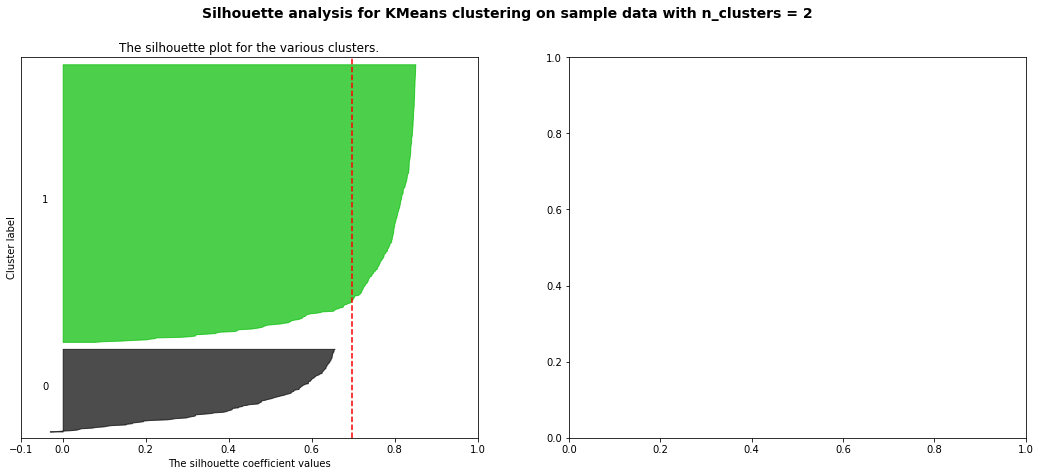

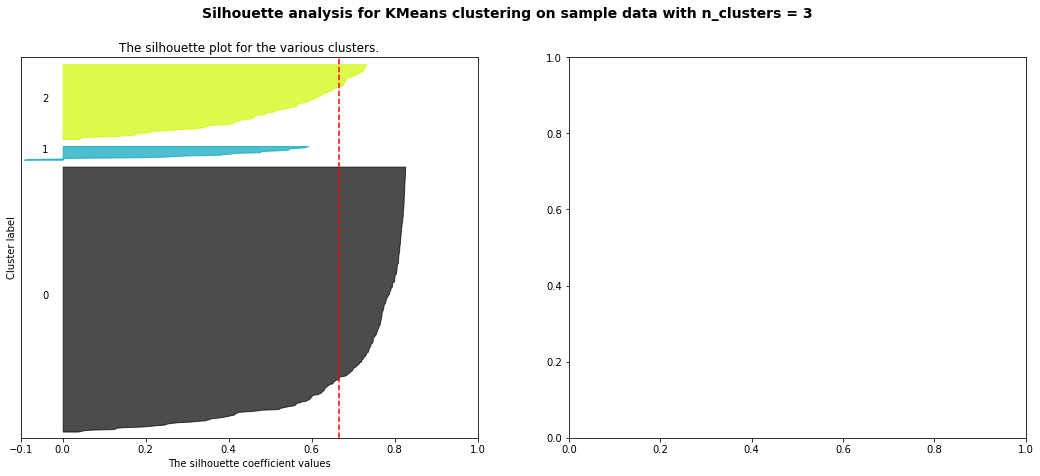

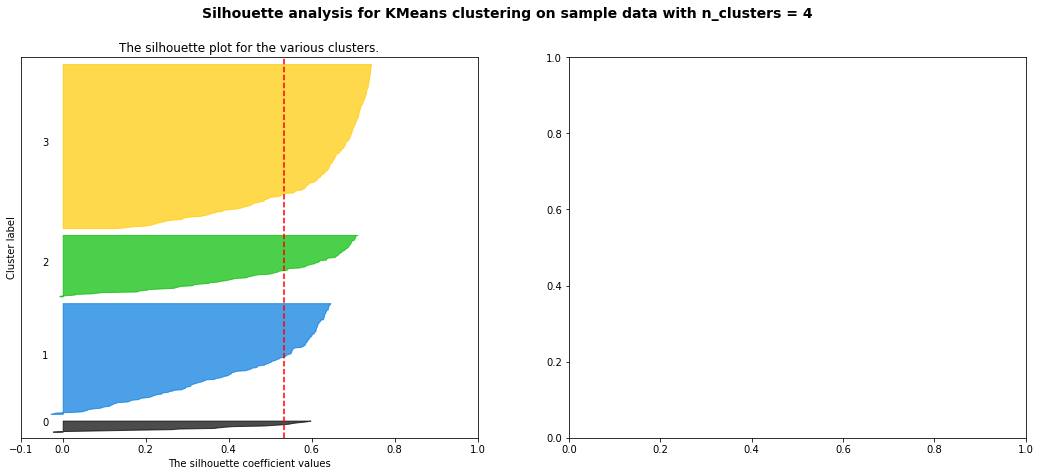

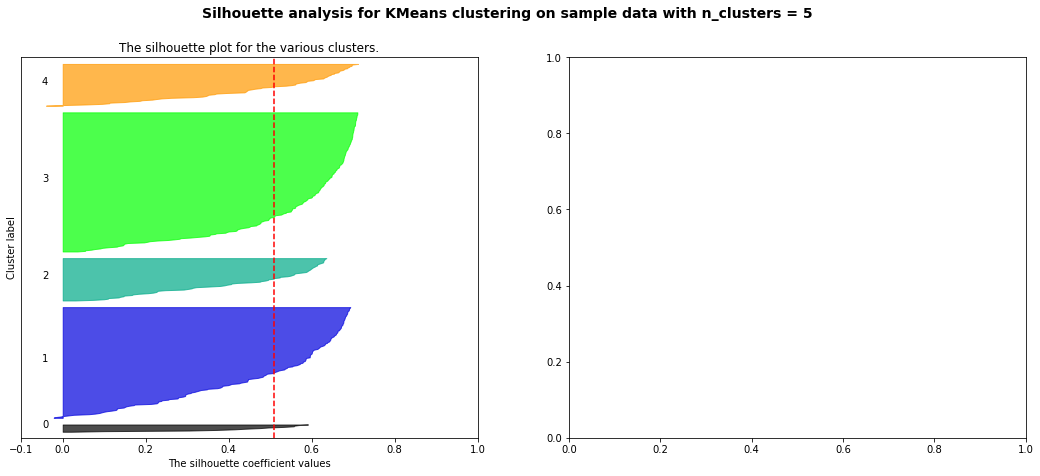

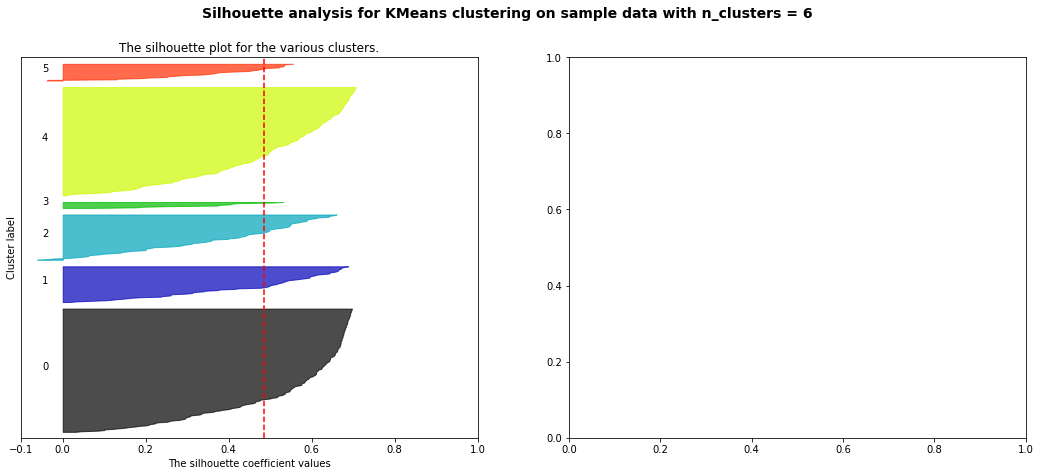

In [0]:
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6]
def plot_silhouette(data, range_n_clusters):

  for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
      # Aggregate the silhouette scores for samples belonging to
      # cluster i, and sort them
      ith_cluster_silhouette_values = \
          sample_silhouette_values[cluster_labels == i]

      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cm.nipy_spectral(float(i) / n_clusters)
      ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)

      # Label the silhouette plots with their cluster numbers at the middle
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

      # Compute the new y_lower for next plot
      y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    # colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    # ax2.scatter(data[:, 0], data[:, 1], marker='.', s=30, lw=0, alpha=0.7,
    #             c=colors, edgecolor='k')

    # Labeling the clusters
    # centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    # ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
    #             c="white", alpha=1, s=200, edgecolor='k')

    # for i, c in enumerate(centers):
    #     ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
    #                 s=50, edgecolor='k')

    # ax2.set_title("The visualization of the clustered data.")
    # ax2.set_xlabel("Feature space for the 1st feature")
    # ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

pca_features = PCA().fit_transform(Z)
plot_silhouette(data, range_n_clusters)